In [1]:
#importing dependencies
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.stats import sem, ttest_ind, linregress


READING CSV AND DATA CLEANUP

In [2]:
#creating a path for the csv file
csv_file = "../Datasets/cumulative-co-emissions.csv"

In [3]:
# reading the csv file and creating a dataframe
global_temp_CO2_df = pd.read_csv(csv_file)
global_temp_CO2_df.head()

,YR,CO2,land_ocean_temp_index,land_ocean_temp_index_smoothed
0,1880,5.596738e+10,-0.19,-0.11
1,1881,5.861068e+10,-0.10,-0.14
2,1882,6.139991e+10,-0.11,-0.18
3,1883,6.436377e+10,-0.19,-0.21
4,1884,6.736057e+10,-0.28,-0.24


In [4]:
#Checking how many values each column has
global_temp_CO2_df.count()


YR                                137
CO2                               137
land_ocean_temp_index             137
land_ocean_temp_index_smoothed    137
dtype: int64

In [5]:
del global_temp_CO2_df['land_ocean_temp_index']
global_temp_CO2_df.head()

,YR,CO2,land_ocean_temp_index_smoothed
0,1880,5.596738e+10,-0.11
1,1881,5.861068e+10,-0.14
2,1882,6.139991e+10,-0.18
3,1883,6.436377e+10,-0.21
4,1884,6.736057e+10,-0.24


In [6]:
global_temp_CO2_df_clean_df= global_temp_CO2_df.dropna(how='any')
global_temp_CO2_df_clean_df.tail()

,YR,CO2,land_ocean_temp_index_smoothed
132,2012,4.119100e+12,0.67
133,2013,4.222920e+12,0.71
134,2014,4.327600e+12,0.76
135,2015,4.432540e+12,0.80
136,2016,4.467350e+12,0.85


OBSERVATION OF LAND OCEAN TEMPERATURE INDEX AND CO2 EMISSION OVER TIME 

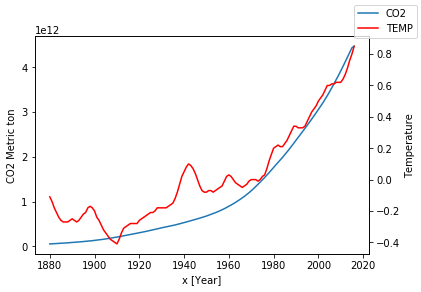

In [7]:
x = global_temp_CO2_df_clean_df['YR']
y = global_temp_CO2_df_clean_df['CO2']
z = global_temp_CO2_df_clean_df['land_ocean_temp_index_smoothed']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y, '-', label = 'CO2')

ax2 = ax.twinx()
ax2.plot(x,z, '-r', label = 'TEMP')
fig.legend(loc=1)

ax.set_xlabel("x [Year]")
ax.set_ylabel(r"CO2 Metric ton")
ax2.set_ylabel(r"Temperature")
plt.show()

In [8]:
# Filtering the data from 1905 to 1950
global_temp_CO2_df_clean_df_1950_df = global_temp_CO2_df_clean_df.loc[global_temp_CO2_df_clean_df["YR"] <= 1950, :]
global_temp_CO2_df_clean_df_1950_df.head()

,YR,CO2,land_ocean_temp_index_smoothed
0,1880,5.596738e+10,-0.11
1,1881,5.861068e+10,-0.14
2,1882,6.139991e+10,-0.18
3,1883,6.436377e+10,-0.21
4,1884,6.736057e+10,-0.24


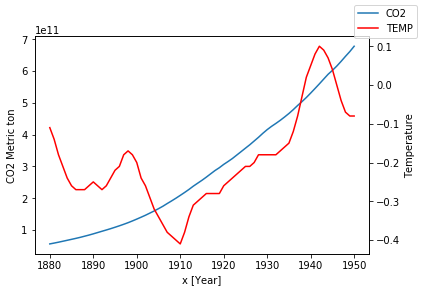

In [9]:
x = global_temp_CO2_df_clean_df_1950_df['YR']
y = global_temp_CO2_df_clean_df_1950_df['CO2']
z = global_temp_CO2_df_clean_df_1950_df['land_ocean_temp_index_smoothed']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y, '-', label = 'CO2')

ax2 = ax.twinx()
ax2.plot(x,z, '-r', label = 'TEMP')
fig.legend(loc=1)

ax.set_xlabel("x [Year]")
ax.set_ylabel(r"CO2 Metric ton")
ax2.set_ylabel(r"Temperature")

plt.show()

In [10]:
# Filtering the data from 1950 to 2018
global_temp_CO2_df_2000_df = global_temp_CO2_df_clean_df.loc[global_temp_CO2_df_clean_df["YR"] >= 1950, :]
global_temp_CO2_df_2000_df.head()

,YR,CO2,land_ocean_temp_index_smoothed
70,1950,6.781870e+11,-0.08
71,1951,6.962910e+11,-0.07
72,1952,7.146130e+11,-0.07
73,1953,7.334090e+11,-0.08
74,1954,7.524740e+11,-0.07


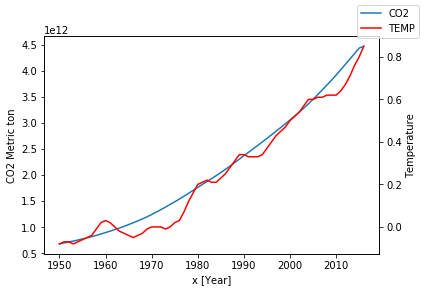

In [11]:
x = global_temp_CO2_df_2000_df['YR']
y = global_temp_CO2_df_2000_df['CO2']
z = global_temp_CO2_df_2000_df['land_ocean_temp_index_smoothed']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y, '-', label = 'CO2')

ax2 = ax.twinx()
ax2.plot(x,z, '-r', label = 'TEMP')
fig.legend(loc=1)

ax.set_xlabel("x [Year]")
ax.set_ylabel(r"CO2 Metric ton")
ax2.set_ylabel(r"Temperature")

plt.show()

CORRELATION of LAND OCEAN TEMPERATURE INDEX AND CO2 Emission FROM 1880 to 1950

In [12]:
# Filtering the data from 1880 to 1950
global_temp_CO2_1950_df = global_temp_CO2_df.loc[global_temp_CO2_df["YR"] <= 1950, :]
global_temp_CO2_1950_df.tail()


,YR,CO2,land_ocean_temp_index_smoothed
66,1946,6.157240e+11,0.00
67,1947,6.306470e+11,-0.04
68,1948,6.463620e+11,-0.07
69,1949,6.613940e+11,-0.08
70,1950,6.781870e+11,-0.08


In [13]:
#Setting the x axis and y axis for the scatter plot
CO2 = global_temp_CO2_1950_df["CO2"]
Temperature = global_temp_CO2_1950_df["land_ocean_temp_index_smoothed"]

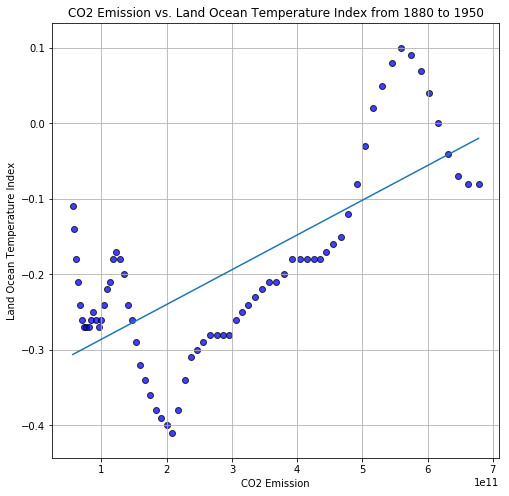

<Figure size 432x288 with 0 Axes>

In [14]:
# Creating a scatter plot and formatting 
plt.figure(figsize=(8,8))
plt.scatter(CO2, Temperature, marker="o", facecolors="blue", edgecolors="black", linewidths =1,
             alpha=0.75, label="TempvsCO2")

plt.title("CO2 Emission vs. Land Ocean Temperature Index from 1880 to 1950")
plt.xlabel("CO2 Emission")
plt.ylabel("Land Ocean Temperature Index")


# Line plot
slope, intercept, r_value, p_value, std_err = linregress(CO2,Temperature)
line = slope * CO2 + intercept

plt.plot(CO2, line)

plt.grid()
plt.show()
plt.savefig("../Images/CO2vsTemp50.png")
plt.show()

In [15]:
linregress(CO2, Temperature)


LinregressResult(slope=4.603302087685254e-13, intercept=-0.3320095919939984, rvalue=0.7035100013394876, pvalue=7.822968637862607e-12, stderr=5.5982465696639875e-14)

Observation

From the regression analysis, we see that from the year of 1950 to 2016, there is a strong positive correlation between Land Ocean Temperature Index C and CO2 emission(rvalue = 0.70). We can reject the null hypothesis because the p-value is smaller than 0.05 (pvalue = 7.82 e-56). We conclude that there is is correlation between Land Ocean Temperature Index C and CO2 Emission between the year of 1880 to 1950.

CORRELATION of LAND OCEAN TEMPERATURE INDEX AND CO2 Emission FROM 1950 to 2016

In [16]:
# Filtering the data from 1950 to 2016
global_temp_CO2_2016_df = global_temp_CO2_df.loc[global_temp_CO2_df["YR"] > 1950, :]
global_temp_CO2_2016_df.tail()

,YR,CO2,land_ocean_temp_index_smoothed
132,2012,4.119100e+12,0.67
133,2013,4.222920e+12,0.71
134,2014,4.327600e+12,0.76
135,2015,4.432540e+12,0.80
136,2016,4.467350e+12,0.85


In [17]:
#Setting the x axis and y axis for the scatter plot
CO2_16 = global_temp_CO2_2016_df["CO2"]
Temperature_16 = global_temp_CO2_2016_df["land_ocean_temp_index_smoothed"]

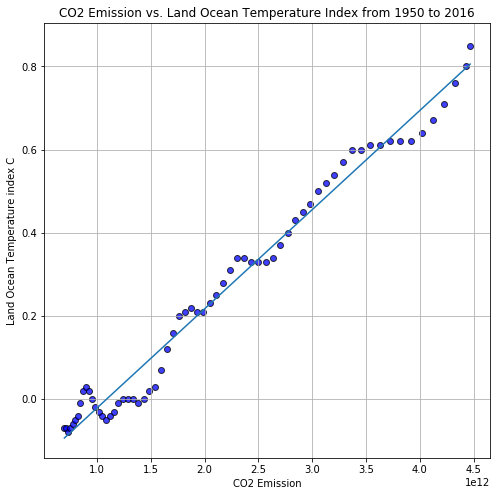

<Figure size 432x288 with 0 Axes>

In [18]:
# Creating a scatter plot and formatting 
plt.figure(figsize=(8,8))
plt.scatter(CO2_16, Temperature_16, marker="o", facecolors="blue", edgecolors="black", linewidths =1,
             alpha=0.75, label="CvsCO2")

plt.title("CO2 Emission vs. Land Ocean Temperature Index from 1950 to 2016")
plt.xlabel("CO2 Emission")
plt.ylabel("Land Ocean Temperature index C")

# Line plot
slope, intercept, r_value, p_value, std_err = linregress(CO2_16,Temperature_16)
line = slope * CO2_16 + intercept

plt.plot(CO2_16, line)

plt.grid()
plt.show()
plt.savefig("../Images/CO2vsC16.png")

In [19]:
linregress(CO2_16, Temperature_16)

LinregressResult(slope=2.38384997940379e-13, intercept=-0.25947726985085, rvalue=0.9897080800457065, pvalue=9.176002689132117e-56, stderr=4.308486135022476e-15)

Observation

From the regression analysis, we see that from the year of 1950 to 2016, there is a strong positive correlation between Land Ocean Temperature Index C and CO2 emission(rvalue = 0.9). We can reject the null hypothesis because the p-value is smaller than 0.05 (pvalue = 9.17 e-56). We conclude that there is is correlation between Land Ocean Temperature Index C and CO2 Emission between the year of 1950 to 2016. 

READING GDP CSC AND DATA CLEANUP

In [20]:
#creating a path for the csv file
gdp_file = "../Datasets/world-gdp-over-the-last-two-millennia.csv"

In [21]:
# reading the csv file and creating a dataframe
global_gdp_df = pd.read_csv(gdp_file)
global_gdp_df.head()

,Entity,Code,Year,GDP per Capita
0,World,OWID_WRL,1,1.830000e+11
1,World,OWID_WRL,1000,2.100000e+11
2,World,OWID_WRL,1500,4.310000e+11
3,World,OWID_WRL,1600,5.740000e+11
4,World,OWID_WRL,1700,6.430000e+11


In [22]:
#Deleting useless columns 
del global_gdp_df['Code']
del global_gdp_df['Entity']
global_gdp_df.head()

,Year,GDP per Capita
0,1,1.830000e+11
1,1000,2.100000e+11
2,1500,4.310000e+11
3,1600,5.740000e+11
4,1700,6.430000e+11


In [23]:
global_gdp_df.count()

Year              76
GDP per Capita    76
dtype: int64

In [24]:
global_gdp_renamed_df = global_gdp_df.rename(columns= {'Year':'YR'})
global_gdp_renamed_df.head()

,YR,GDP per Capita
0,1,1.830000e+11
1,1000,2.100000e+11
2,1500,4.310000e+11
3,1600,5.740000e+11
4,1700,6.430000e+11


In [25]:
global_temp_gdp_df = pd.merge(global_temp_CO2_df, global_gdp_renamed_df, on="YR")
global_temp_gdp_df.head()

,YR,CO2,land_ocean_temp_index_smoothed,GDP per Capita
0,1900,1.340750e+11,-0.20,3.420000e+12
1,1913,2.377000e+11,-0.31,4.740000e+12
2,1940,5.307770e+11,0.05,7.810000e+12
3,1950,6.781870e+11,-0.08,9.250000e+12
4,1951,6.962910e+11,-0.07,9.800000e+12


CORRELATION ANALYSIS BETWEEN GDP and CO2 EMISSION 

In [51]:
#Setting the x axis and y axis for the scatter plot
GDP = global_temp_gdp_df["GDP"]
CO2 = global_temp_gdp_df["CO2"]

KeyError: 'GDP'

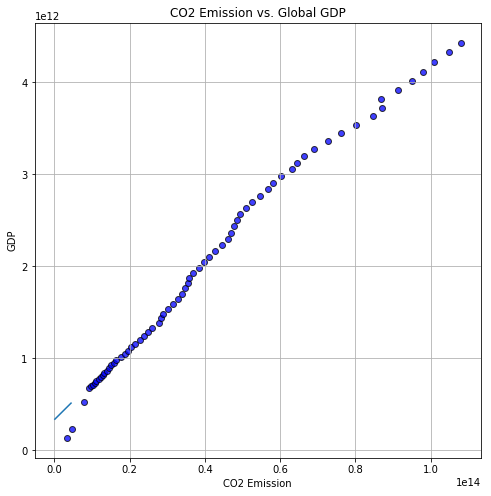

<Figure size 432x288 with 0 Axes>

In [52]:
# Creating a scatter plot and formatting 
plt.figure(figsize=(8,8))
plt.scatter(GDP, CO2, marker="o", facecolors="blue", edgecolors="black", linewidths =1,
             alpha=0.75, label="GDPvsCO2")

plt.title("CO2 Emission vs. Global GDP")
plt.xlabel("CO2 Emission")
plt.ylabel("GDP")


# Line plot
slope, intercept, r_value, p_value, std_err = linregress(GDP,CO2)
line = slope * CO2 + intercept

plt.plot(CO2, line)

plt.grid()
plt.show()
plt.savefig("../Images/CO2vsGDP.png")
plt.show()

In [53]:
linregress(GDP, CO2)

LinregressResult(slope=0.04063759056600702, intercept=333600030002.37256, rvalue=0.9934077672746993, pvalue=9.207284710310928e-65, stderr=0.0005728980396615241)

Observation

From the regression analysis, we see that from the year of 1900 to 2015, there is a strong positive correlation between GDP and CO2 emission(rvalue = 0.9). We can reject the null hypothesis because the p-value is smaller than 0.05 (pvalue = 9.20 e-65). We conclude that there is is correlation between GDP and CO2 Emission between the year of 1950 to 2016

INDEPENDENT T-TEST ON CO2 EMISSION BETWEEN (1880-1950) and (1950-2016)

In [29]:

first_period = global_temp_CO2_df.loc[global_temp_CO2_df["YR"] < 1950]
first_period.head()

,YR,CO2,land_ocean_temp_index_smoothed
0,1880,5.596738e+10,-0.11
1,1881,5.861068e+10,-0.14
2,1882,6.139991e+10,-0.18
3,1883,6.436377e+10,-0.21
4,1884,6.736057e+10,-0.24


In [30]:
second_period = global_temp_CO2_df.loc[global_temp_CO2_df["YR"] >= 1950]
second_period.head()

,YR,CO2,land_ocean_temp_index_smoothed
70,1950,6.781870e+11,-0.08
71,1951,6.962910e+11,-0.07
72,1952,7.146130e+11,-0.07
73,1953,7.334090e+11,-0.08
74,1954,7.524740e+11,-0.07


In [37]:
ttest_ind(first_period['land_ocean_temp_index_smoothed'], second_period['land_ocean_temp_index_smoothed'], 
          equal_var=False)

Ttest_indResult(statistic=-12.236812059147972, pvalue=7.025285678956423e-21)

In [32]:
ttest_ind(first_period['CO2'], second_period['CO2'], equal_var=False)

Ttest_indResult(statistic=-13.06026454473348, pvalue=2.373219816077823e-20)

Based on P value from T test, we can see that there is a significant difference in temperature index over 2 time periods: 1880 to 1950 vs 1950 to 2019. We notice same pattern for CO2 as well.